# SPAM CLASSIFICATION USING NLP & MACHINE LEARNING

## IMPORTING LIBRAIRES AND DATASET

In [107]:
import pandas as pd
import re
import nltk

In [108]:
messages = pd.read_csv('SMSSpamCollection.csv',names=["label", "message"])

In [109]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## DATA PREPROCESSING STARTS

### REMOVING STOPWORDS AND LEMMATIZATION

In [110]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#ps = PorterStemmer()
lm=WordNetLemmatizer()
corpus = []

In [111]:
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [lm.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

### BAG OF WORDS WITH Tf-Idf VECTORIZATION


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()



### CREATING DUMMY VALUES FOR THE LABEL FEATURE

In [129]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [114]:
y[5:]

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

### SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## MODEL FITTING WITH MACHINE LEARNING

In [116]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [117]:
y_pred=spam_detect_model.predict(X_test)

### CONFUSION MATRIX

In [118]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[950,   0],
       [ 24, 141]], dtype=int64)

# ACCURACY

In [119]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [120]:
print(accuracy*100)

97.847533632287


# VISUALIZATION WITH WORDCLOUD TO FIN MOST FREQUENT WORDS


In [121]:
a=messages.loc[messages['label'] == "ham"]
b=messages.loc[messages['label'] == "spam"]


In [122]:
a['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object

### IMPORTING WORDCLOUD AND MATPLOTLIB

In [123]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [124]:
a1="".join(a['message'])
cloud=WordCloud(background_color="white").generate(a1)

# MOST FREQUENT WORDS IN NON-SPAM MESSAGES

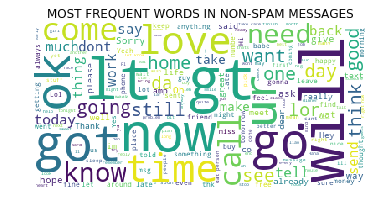

In [125]:
plt.imshow(cloud)
plt.axis('off')
plt.title("MOST FREQUENT WORDS IN NON-SPAM MESSAGES")
plt.show()

# MOST FREQUENT WORDS IN SPAM MESSAGES

In [126]:
b1="".join(b['message'])
cloud1=WordCloud(background_color="white").generate(b1)

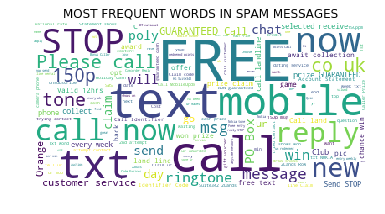

In [128]:
plt.imshow(cloud1)
plt.axis('off')
plt.title("MOST FREQUENT WORDS IN SPAM MESSAGES")
plt.show()

# ------------------------------------------------------------------------------------------------------